In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

# Neural Network training and investigation on the mnist dataset.

## Import needed python libraries

In [3]:
import os
import random
import pandas as pd
import numpy as np
import tensorflow as tf
import time
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, InputLayer
from keras import backend as K
from keras.utils import to_categorical
from matplotlib import pyplot
import ipywidgets
from gahyparopt import gahyperopt as ga 
from tensorflow.keras.utils import plot_model

## Set GPU device

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"]="4"

## Load the data

In [5]:
# Get test and training data.
data = ga.load_mnist()

In [6]:
@ipywidgets.interact(i=ipywidgets.IntSlider(min=0, max=40000-1, step=100, value=0))
def plot_mnist_figure(i):
    print(data['y_train'][i])
    pyplot.imshow(data['x_train'][i].reshape(28,28), cmap='bone_r')

interactive(children=(IntSlider(value=0, description='i', max=39999, step=100), Output()), _dom_classes=('widg…

## Define functions

In [14]:
Dropout?

Init signature: Dropout(*args, **kwargs)
Docstring:     
Applies Dropout to the input.

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.
Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over
all inputs is unchanged.

Note that the Dropout layer only applies when `training` is set to True
such that no values are dropped during inference. When using `model.fit`,
`training` will be appropriately set to True automatically, and in other
contexts, you can set the kwarg explicitly to True when calling the layer.

(This is in contrast to setting `trainable=False` for a Dropout layer.
`trainable` does not affect the layer's behavior, as Dropout does
not have any variables/weights that can be frozen during training.)

>>> tf.random.set_seed(0)
>>> layer = tf.keras.layers.Dropout(.2, input_shape=(2,))
>>> data = np.arange(10).reshape(5, 2).astype(np.float32)
>>> print(data)
[[0. 1.]
 

In [15]:
def generate_reference_ml():
    """
    Train and Generate NN Model based on https://github.com/fchollet/deep-learning-with-python-notebooks/blobs/master/2.1-a-first-look-at-a-neural-netword.ipynb'
    :param df: Dataframe to Training Process
    :return:
    """

    # Define Neural model Topology
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
    model.add(Dropout(.2))
    model.add(Dense(10, activation='softmax'))

    # Compile Neural model
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

    display(plot_model(model, show_shapes=True, show_layer_names=False))
    
    return model

def model_training(model, data):
    run_start = time.time()
    # Fit Model with Data
    x_train, y_train, x_val, y_val = data.values()
    training = model.fit(x_train, y_train,
        epochs=20,
        batch_size=128,
        steps_per_epoch=300,
        verbose=1,
        validation_data=(x_val, y_val),
    )

    run_stop = time.time()
    print(f"Done > Takes {run_stop-run_start} sec")
    
    return model, training



## Create a model and perform the training.

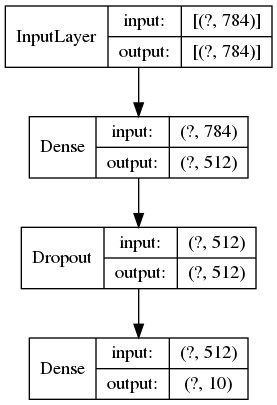

In [16]:
ml_model = generate_reference_ml()

In [17]:
model, training = model_training(ml_model, data)

Epoch 1/20
300/300 [==============================] - 2s 5ms/step - loss: 0.3330 - accuracy: 0.9029 - val_loss: 0.1796 - val_accuracy: 0.9492
Epoch 2/20
300/300 [==============================] - 2s 5ms/step - loss: 0.1460 - accuracy: 0.9579 - val_loss: 0.1371 - val_accuracy: 0.9597
Epoch 3/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0985 - accuracy: 0.9705 - val_loss: 0.1091 - val_accuracy: 0.9671
Epoch 4/20
300/300 [==============================] - 2s 5ms/step - loss: 0.0768 - accuracy: 0.9775 - val_loss: 0.0995 - val_accuracy: 0.9707
Epoch 5/20
300/300 [==============================] - 2s 5ms/step - loss: 0.0600 - accuracy: 0.9819 - val_loss: 0.0906 - val_accuracy: 0.9736
Epoch 6/20
300/300 [==============================] - 2s 5ms/step - loss: 0.0486 - accuracy: 0.9851 - val_loss: 0.1043 - val_accuracy: 0.9711
Epoch 7/20
300/300 [==============================] - 2s 5ms/step - loss: 0.0420 - accuracy: 0.9872 - val_loss: 0.0873 - val_accuracy: 0.9754
Epoch 

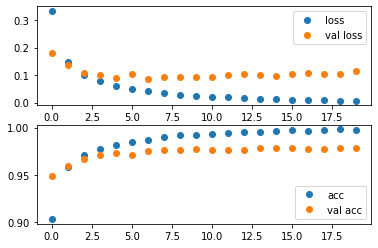

In [18]:
history = pd.DataFrame(training.history)

fig, ax = pyplot.subplots(2,1)
history['loss'].plot(ax=ax[0], style="o",label='loss')
history['val_loss'].plot(ax=ax[0], style="o",label='val loss')
ax[0].legend()
history['accuracy'].plot(ax=ax[1], style="o",label='acc')
history['val_accuracy'].plot(ax=ax[1], style="o",label='val acc')
ax[1].legend()

In [19]:
loss, accuracy = model.evaluate(x=data['x_val'], y=data['y_val'])

625/625 [==============================] - 2s 2ms/step - loss: 0.1133 - accuracy: 0.9779


In [13]:
print(f"Validation loss = {loss}")
print(f"Validation accuracy = {accuracy}")

Validation loss = 0.24158364534378052
Validation accuracy = 0.9753000140190125


## Was sagt das Model eigentlich voraus?

In [13]:
predicted = model.predict(data['x_val'])
expected = data['y_val']

In [14]:
predicted[0]

array([1.22462195e-24, 1.34585687e-16, 2.61039778e-16, 1.99501769e-11,
       9.23840560e-23, 6.39833574e-21, 3.36443197e-33, 1.00000000e+00,
       5.12211411e-16, 9.82410331e-09], dtype=float32)

In [15]:
@ipywidgets.interact(i=ipywidgets.IntSlider(min=0, max=20000-1, step=10, value=0))
def plot_prediction(i):
    fig, ax = pyplot.subplots(2,1, figsize=(10,10))
    ax[0].imshow(data['x_val'][i].reshape(28,28), cmap='bone_r')
    ax[0].set_title('MNIST')
    ax[1].bar(x=range(10), height=predicted[i,:], label="NN prediction")
    ax[1].bar(x=range(10), height=predicted[i,:], label="Truth", width=0.2)
    ax[1].set_yscale('log')
    ax[1].set_ylim([0.01, 1])
    ax[1].set_title('Prediction')

interactive(children=(IntSlider(value=0, description='i', max=19999, step=10), Output()), _dom_classes=('widge…

Das Modell sagt voraus, mit welcher **Voraussichtlichkeit**, eine Ziffer einer Zahl zuzuordnen ist.

## Welche Zahlen werden nicht gut erkannt?

In [16]:
expected = data['y_val']

In [17]:
expected.shape

(20000, 10)

Berechne die Differenz zwischen Model und Wahrheit: Falls alle Vorhersagen richtig, Differenz = 0

In [18]:
difference = np.sum((predicted-expected)**2, -1)

In [19]:
mismatched = predicted[difference>0.5]
expected_mm = expected[difference>0.5]
images = data['x_val'][difference>0.5,:]

In [21]:
@ipywidgets.interact(i=ipywidgets.IntSlider(min=0, max=len(mismatched-1), step=1, value=0))
def plot_mismatch(i):
    fig, ax = pyplot.subplots(2,1, figsize=(10,10))
    ax[0].imshow(images[i].reshape(28,28), cmap='bone_r')
    ax[0].set_title('MNIST')
    ax[1].bar(x=range(10), height=mismatched[i,:], label="NN Prediction")
    ax[1].bar(x=range(10), height=expected_mm[i,:], width=0.2, label="Truth")
    ax[1].set_yscale('log')
    ax[1].set_ylim([0.01, 1])
    ax[1].legend(loc=1)
    

interactive(children=(IntSlider(value=0, description='i', max=417), Output()), _dom_classes=('widget-interact'…

## Aufgaben
### Veraendere:
#### die Anzahl der Epochen (warum?)
#### die Anzahl der (internen) Netzwerkschichten: 2, 3, 4
#### die Anzahl der Neuronen in der/den versteckten Schichten (128, 256, 512).
### Notiere jeweils die Werte fuer "Validation loss" und "Validation accuracy"
### Fuer welche Kombination von Parametern erhaelst du die beste Validation accuracy
### Evaluiere zum Schluss das "beste" Modell mit dem Test Datensatz (`data[x_test`/`y_test]`]